In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pyfonts import load_google_font

#nhd_file = '../data/NHD_H_1705_HU4_GPKG.gpkg' # Middle Snake (inc. Boise)
nhd_file = '../data/NHD_H_1704_HU4_GPKG.gpkg' # Upper Snake

ws_file = '../data/hfork_ws/hfork_geometry.shp'

epsg_utm = 32612

In [2]:
gpd.list_layers(nhd_file)

/Users/lejoflores/GEOS-505-Fall2025/env/lib/python3.12/site-packages/pyogrio/core.py:130: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_list_layers(get_vsi_path_or_buffer(path_or_buffer))


,name,geometry_type
0,NHDArea,MultiPolygon Z
1,NHDAreaEventFC,MultiPolygon
2,NHDFlowline,MultiLineString Z
3,NHDLine,MultiLineString Z
4,NHDLineEventFC,MultiLineString
5,NHDPoint,Point Z
6,NHDPointEventFC,Point
7,NHDWaterbody,MultiPolygon Z
8,WBDHU10,MultiPolygon
9,WBDHU12,MultiPolygon


In [3]:
nhd_gdf = gpd.read_file(nhd_file, layer='NHDFlowline')
nhd_gdf

/Users/lejoflores/GEOS-505-Fall2025/env/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(


,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,visibilityfilter,SHAPE_Length,Enabled,resolution_description,flowdir_description,mainpath_description,innetwork_description,visibilityfilter_description,fcode_description,geometry
0,89300860,2012-02-19 12:13:07+00:00,2,None,None,0.020,17040212008018,1,89300180,558,...,5000000,0.000244,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-114.35506 42.58901 0, -11..."
1,89309308,2012-02-19 12:13:05+00:00,2,01533479,Snake River,0.425,17040212000101,1,120008088,558,...,5000000,0.003847,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-114.8439 42.73403 0, -114..."
2,{2A0C840A-DA57-4994-A359-E2FC860004C0},2012-02-19 12:11:22+00:00,2,00395886,W Canal,1.557,17040212000661,1,89312682,558,...,5000000,0.017627,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-114.5474 42.80119 0, -114..."
3,89295496,2012-02-19 12:10:03+00:00,2,00395877,S Canal,0.007,17040212000760,1,{191F6888-20E9-4FE7-A705-F3254C4F60A4},558,...,5000000,0.000076,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-114.55199 42.751 0, -114...."
4,28070943,2012-02-19 10:14:32+00:00,2,None,None,0.022,17040103003692,1,120008080,558,...,5000000,0.000259,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-110.69591 42.84068 0, -11..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134240,89297524,2012-02-19 12:09:09+00:00,2,00373092,Hog Creek,0.047,17040212000527,1,89297088,558,...,250000,0.000496,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:250,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-115.10009 43.05868 0, -11..."
134241,89302836,2012-02-19 12:13:07+00:00,2,00395867,Milner Gooding Canal,0.499,17040212000935,1,89312686,558,...,5000000,0.005411,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-114.02268 42.59879 0, -11..."
134242,73632365,2012-02-19 12:16:48+00:00,2,None,None,0.046,17040213001556,1,73631989,558,...,2000000,0.000436,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:2,000,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-115.02736 42.21673 0, -11..."
134243,73639279,2012-02-19 12:17:17+00:00,2,00380566,Diamond Creek,0.015,17040213001608,1,73638569,558,...,24000,0.000145,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:24,000 or Larger Scale",Artificial Path,"MULTILINESTRING Z ((-114.3046 42.16536 0, -114..."


In [4]:
gpd.list_layers(ws_file)

,name,geometry_type
0,hfork_geometry,Polygon


In [5]:
ws_gdf = gpd.read_file(ws_file)
ws_gdf

,sourcedata,areaacres,sourcefeat,shape_leng,states,sourceorig,shape_area,huc8,areasqkm,name,tnmid,metasource,loaddate,gnis_id,geometry
0,None,1094937.85,None,5.13658412348482,WY,None,0.497002089785367,17040101,4431.06,Snake Headwaters,{90DC8792-B2F0-40F2-8683-7694DD4F3266},None,20161018094234,None,"POLYGON ((-110.87935 43.86176, -110.87914 43.8..."
1,None,360348.06,None,3.1171632833957,ID,None,0.162814989175519,17040201,1458.28,Idaho Falls,{69BBDDAC-64E1-47B0-9D05-D996D4AA3E99},None,20130118135515,None,"POLYGON ((-112.39898 43.61964, -112.39886 43.6..."
2,None,399656.62,None,3.45951128838346,WY,None,0.180102410279479,17040102,1617.35,Gros Ventre,{AD73DC2C-3310-4E5D-852C-3F7D7DBE9F45},None,20130118135515,None,"POLYGON ((-110.79884 43.54528, -110.7978 43.54..."
3,None,720407.17,None,5.5028421161583,"ID,WY",None,0.327613366598885,17040203,2915.39,Lower Henrys,{52B1E79B-CAEA-4259-9685-85B8F474DCE5},None,20130118135515,None,"POLYGON ((-111.99276 43.87091, -111.99272 43.8..."
4,None,713125.07,None,3.61406750067146,"ID,WY",None,0.322704103507172,17040204,2885.92,Teton,{7EF75464-E3F0-4548-896B-56E2DFFEBBE4},None,20130118135515,None,"POLYGON ((-111.88442 43.84418, -111.88442 43.8..."
5,None,1012366.97,None,4.97826530946376,"ID,WY",None,0.453722996627192,17040103,4096.91,Greys-Hobock,{85B4DAAE-3F7E-4E1A-9176-1FE9554DCD8B},None,20130118135515,None,"POLYGON ((-111.06389 43.16707, -111.06277 43.1..."
6,None,582686.26,None,2.79152567062514,"ID,WY",None,0.261934024170987,17040104,2358.05,Palisades,{3251640C-D915-4B15-B843-FD02F869CABA},None,20130118135515,None,"POLYGON ((-111.66205 43.58348, -111.66205 43.5..."
7,None,570523.4,None,3.07643439047072,"ID,WY",None,0.254081312551392,17040105,2308.83,Salt,{1D64D958-C50A-4720-9961-59C3523D76EE},None,20130118135515,None,"POLYGON ((-111.33994 43.00389, -111.33974 43.0..."
8,None,701361.95,None,3.65209733458037,"ID,MT,WY",None,0.320476408177841,17040202,2838.31,Upper Henrys,{EB6B6396-FB4C-4CC2-A872-F783AD706BED},None,20130118135515,None,"POLYGON ((-111.77869 44.42496, -111.77868 44.4..."


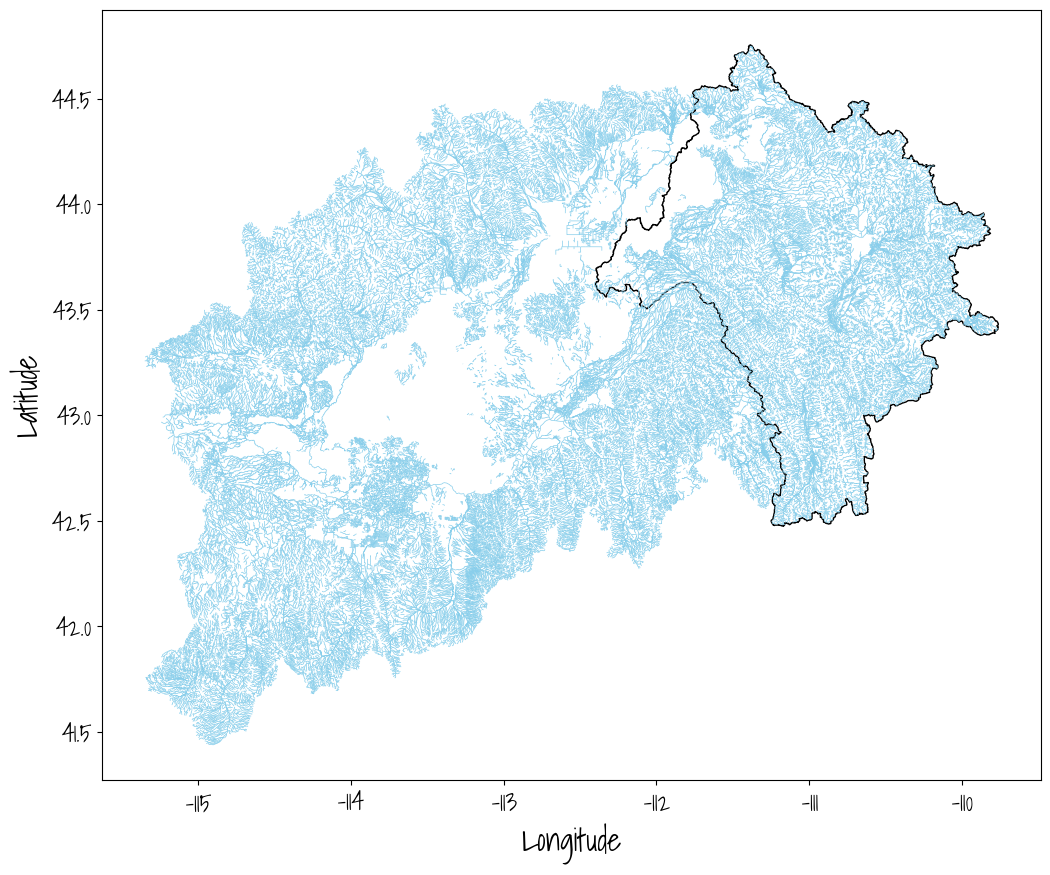

In [6]:
ws_gdf_bnd = ws_gdf.dissolve()

font=load_google_font('Shadows Into Light')

fig, ax = plt.subplots(figsize=(16,10))
nhd_gdf.plot(color='skyblue', linewidth=0.5, figsize=(16,10), ax=ax)
ws_gdf_bnd.plot(edgecolor='black', facecolor='none', ax=ax)
ax.set_xlabel('Longitude', fontsize=22, font=font)
ax.set_ylabel('Latitude', fontsize=22, font=font)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)

for label in ax.get_yticklabels():
    label.set_fontproperties(font)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()

In [7]:
nhd_clipped_gdf = nhd_gdf.clip(ws_gdf_bnd.to_crs(epsg=4269))


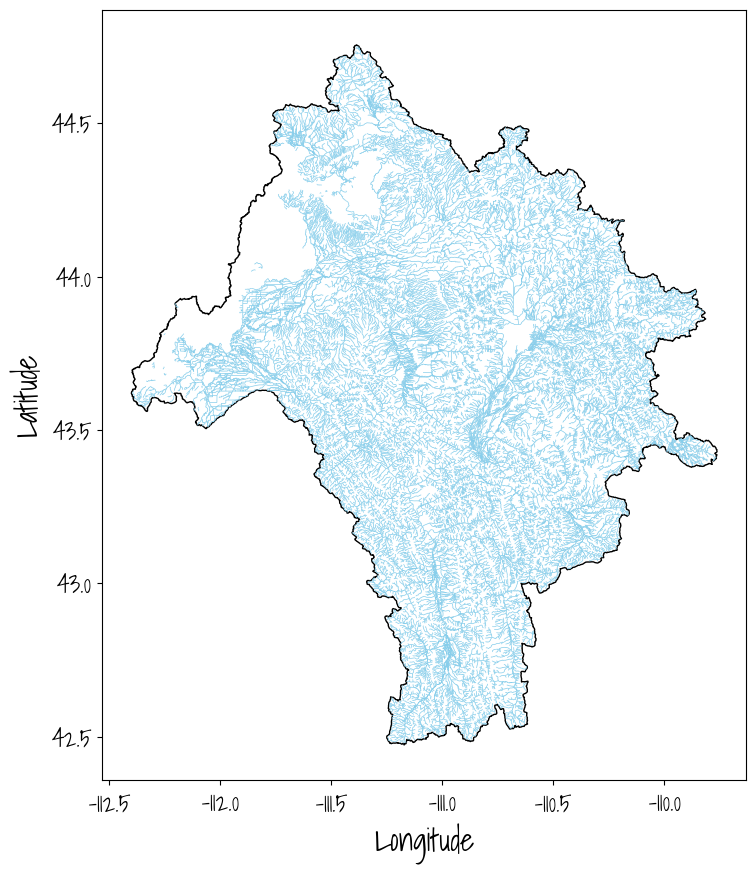

In [8]:
fig, ax = plt.subplots(figsize=(16,10))
nhd_clipped_gdf.plot(color='skyblue', linewidth=0.5, figsize=(16,10), ax=ax)
ws_gdf_bnd.plot(edgecolor='black', facecolor='none', ax=ax)
ax.set_xlabel('Longitude', font=font, fontsize=22)
ax.set_ylabel('Latitude', font=font, fontsize=22)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)

for label in ax.get_yticklabels():
    label.set_fontproperties(font)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()

In [9]:
nhd_perennial_clipped_gdf = nhd_clipped_gdf[nhd_clipped_gdf.fcode_description == 'Stream/River: Hydrographic Category = Perennial']

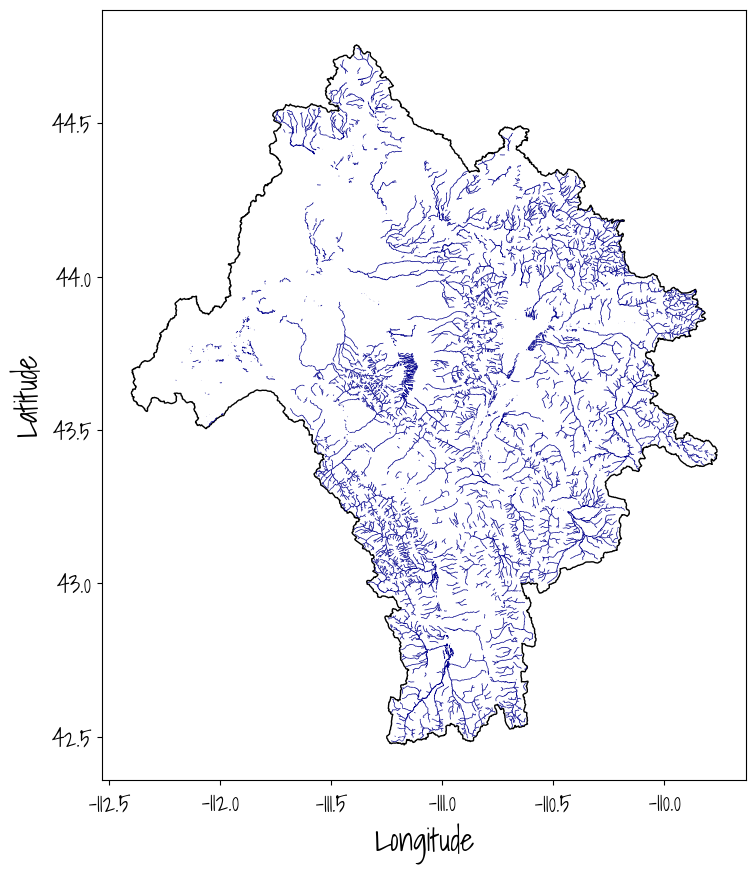

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
nhd_perennial_clipped_gdf.plot(color='darkblue', linewidth=0.5, figsize=(16,10), ax=ax)
ws_gdf_bnd.plot(edgecolor='black', facecolor='none', ax=ax)
ax.set_xlabel('Longitude', fontsize=22, font=font)
ax.set_ylabel('Latitude', fontsize=22, font=font)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)

for label in ax.get_yticklabels():
    label.set_fontproperties(font)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [11]:
nhd_perennial_clipped_gdf.lengthkm.values.sum()

np.float64(10717.86084577)

In [12]:
nhd_perennial_clipped_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [13]:
nhd_ws_utm_gdf = nhd_perennial_clipped_gdf.to_crs(epsg=epsg_utm)
nhd_ws_utm_gdf.crs

<Projected CRS: EPSG:32612>
Name: WGS 84 / UTM zone 12N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 114°W and 108°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-114.0, 0.0, -108.0, 84.0)
Coordinate Operation:
- name: UTM zone 12N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
nhd_ws_utm_gds = nhd_ws_utm_gdf.geometry
nhd_ws_utm_gds

42394     LINESTRING Z (403424.114 4834846.178 0, 403423...
107851    LINESTRING Z (403425.066 4835040.637 0, 403424...
61564     LINESTRING Z (484970.446 4703750.101 0, 484988...
56730     LINESTRING Z (484964.382 4703765.97 0, 484970....
34236     LINESTRING Z (485280.158 4703762.216 0, 485299...
                                ...                        
102157    LINESTRING Z (470827.352 4952674.722 0, 470857...
60669     LINESTRING Z (470872.912 4953743.844 0, 470892...
70096     LINESTRING Z (470591.534 4954132.04 0, 470597....
59706     LINESTRING Z (470584.556 4954219.852 0, 470593...
88171     LINESTRING Z (469568.334 4954404.056 0, 469573...
Name: geometry, Length: 15530, dtype: geometry

In [15]:
nhd_ws_utm_buffer = nhd_ws_utm_gds.buffer(100.0)
nhd_ws_utm_buffer

42394     POLYGON ((403323.658 4834898.357, 403323.664 4...
107851    POLYGON ((403324.792 4835061.958, 403325.008 4...
61564     POLYGON ((485050.765 4703810.384, 485053.279 4...
56730     POLYGON ((485063.859 4703785.795, 485066.907 4...
34236     POLYGON ((485229.143 4703852.543, 485236.321 4...
                                ...                        
102157    POLYGON ((470950.723 4952633.479, 470952.374 4...
60669     POLYGON ((470798.843 4953676.816, 470796.697 4...
70096     POLYGON ((470551.344 4953978.002, 470548.668 4...
59706     POLYGON ((470495.125 4954175.174, 470494.814 4...
88171     POLYGON ((469503.569 4954480.644, 469510.89 49...
Length: 15530, dtype: geometry

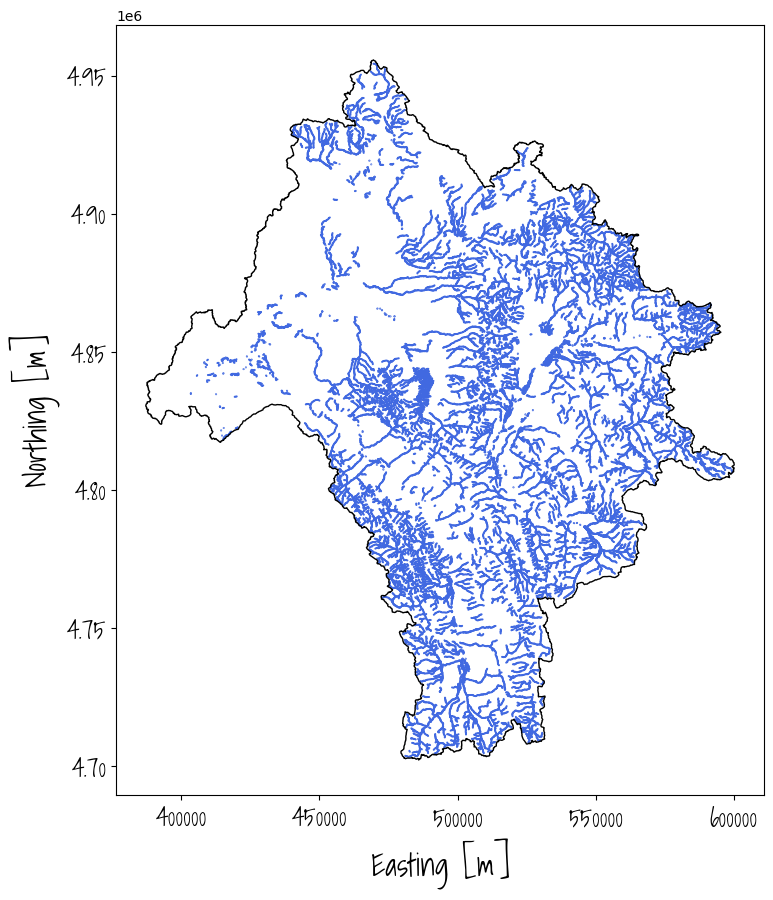

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
nhd_ws_utm_buffer.plot(edgecolor='royalblue', facecolor='lightsteelblue', ax=ax)
ws_gdf_bnd.to_crs(epsg=epsg_utm).plot(edgecolor='black', facecolor='none', ax=ax)
ax.set_xlabel('Easting [m]', fontsize=22, font=font)
ax.set_ylabel('Northing [m]', fontsize=22, font=font)
ax.tick_params(axis='both', which='major', labelsize=18)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)

for label in ax.get_yticklabels():
    label.set_fontproperties(font)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.show()